In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Allows charts to appear in the notebook
%matplotlib inline

In [3]:
def get_artist_term_counts():
    return pd.read_csv('top_artist_terms.csv', index_col='artist_id', names=['artist_id','term', 'term_count'])

def get_term_counts():
    return pd.read_csv('term_counts.csv', names=['term', 'count'])

In [4]:
conn = create_engine('postgresql://@localhost:5432/mcnulty_songs').raw_connection()
cursor = conn.cursor()

/home/munozaaron/.local/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [6]:
track_metadata_features = ['track_metadata.title','track_analysis.duration', 'key', 'loudness', 'mode', 'tempo', 'time_signature']

select_clause = ','.join(track_metadata_features)
select_clause = select_clause + ',track_metadata.artist_name, track_metadata.artist_id'


where_clause = 'track_analysis.track_id = track_metadata.target_id'

query = '''SELECT {} FROM track_analysis 
                                LEFT JOIN track_metadata ON track_metadata.target_id = track_analysis.track_id
                                WHERE {} ; '''.format(select_clause, where_clause)

In [7]:
#results = pd.read_sql_query('''SELECT {} FROM track_analysis, track_metadata
#                                WHERE {} LIMIT 20; '''.format(select_clause, where_clause),conn)

features = pd.read_sql_query(query,conn)
#AND track_metadata.artist_id = (SELECT )


In [8]:
features['key'] = features['key'].astype('category')

features

,title,duration,key,loudness,mode,tempo,time_signature,artist_name,artist_id
0,Mama_ mama can't you see ? ...,104.48934,4,-20.160,0,124.339,4,The Sun Harbor's Chorus-Documentary Recordings...,ARCVMYS12454A51E6E
1,I Made It Over ...,353.77587,1,-7.569,1,167.850,4,Rev. Timothy Wright ...,ARVF2AD1187FB47580
2,In The Journey ...,319.81669,7,-7.185,1,187.378,3,Martin Sexton ...,AR4TLW81187B99683D
3,C On ...,466.99057,11,-7.800,0,140.022,4,The Advent ...,AR00P3M1187FB5428C
4,Night And Day ...,175.20281,9,-9.049,0,156.753,4,The Maytals ...,ARAV0V51187B98F15B
5,High Low And In Between ...,195.49995,9,-8.828,1,85.916,4,Mark Wills ...,ARWVVVP1187FB52F31
6,Caravan ...,377.07710,0,-20.068,1,103.804,4,"Richard ""Groove"" Holmes ...",ARX6NQP1187B9AC98E
7,The Life That I Never Had ...,460.69506,4,-15.298,0,125.013,4,Sektosixo ...,ARDQAEB1269FB38115
8,The Itsy Bitsy Spider ...,50.78159,6,-6.551,0,98.199,1,Dora The Explorer ...,AR3KXHI1187FB3A8BF
9,Battery ...,225.59302,9,-11.709,0,130.019,4,Santa Claws and the Naughty But Nice Orchestra...,ARSRAKS11F4C83FDB5


In [9]:
artist_genres = get_artist_term_counts()

artist_genres.sample(10)

,term,term_count
artist_id,,
AR24DZB1187FB3C869,rock,NaN
AROUACL11F50C4A057,rock,NaN
AROFGAP1187B98CD72,rock,NaN
AR778621187FB4D6D9,jazz,NaN
ARI3H7U1187FB417DA,electronic,NaN
ARWIVMM1187FB482F7,united states,NaN
AR8OK601187B9AB478,reggae,NaN
ARIXZ0N1187FB43077,rock,NaN
ARQE9IB1187B9A70E4,rock,NaN


In [11]:
full_set = pd.merge(features, artist_genres, left_on='artist_id', right_index=True)


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


In [12]:
full_set['artist_name'] = full_set['artist_name'].str.strip()
full_set['term'] = full_set['term'].str.strip()
full_set['title'] = full_set['title'].str.strip()

In [13]:
full_set.sample(5)

,title,duration,key,loudness,mode,tempo,time_signature,artist_name,artist_id,term,term_count
5833,Apa Sebenarnya,307.04281,4,-9.554,0,71.945,3,R.E.M.,ARR6LWJ1187FB44C8B,rock,NaN
750410,Harlem Chit Chat Interlude,49.57995,5,-18.750,1,106.748,1,Fugees (Tranzlator Crew),ARGYWM01187B98DB75,rock,NaN
216191,Infinito (Opción D.F.),243.14730,4,-7.069,0,53.602,4,Bunbury,ARDXENV1187FB3F0F6,rock,NaN
553561,What Did I Ever Give You,249.31220,2,-5.352,0,126.085,3,Kaiser Chiefs,ARVAC3K1187FB4DED4,rock,NaN
373580,Babo Regresa,182.12526,1,-7.367,0,169.943,4,Cartel De Santa,ARE8TB61187FB3601C,hip hop,NaN


In [14]:
full_set['term'].value_counts().head(10)

rock                710388
electronic          117630
pop                  44724
hip hop              22006
united states        17025
jazz                 15721
folk                 10858
alternative rock      5965
latin                 4469
world                 3294
Name: term, dtype: int64

In [13]:
term_counts = get_term_counts()
term_counts = term_counts[~(term_counts['count'] == 'count')]
term_counts['count'] = pd.to_numeric(term_counts['count'])
term_counts.sort_values('count', ascending=False, inplace=True)

term_counts

,term,count
1,rock,27274
2,electronic,24073
3,pop,19637
4,alternative rock,15374
5,hip hop,13834
6,united states,13512
7,house,11837
8,jazz,11673
9,alternative,11089
10,indie,11044


In [14]:
# folk punk techno


## Most Viable Product ##

I'm attempting to classify song genres for Project McNulty. My dataset is the Million Song Dataset (https://labrosa.ee.columbia.edu/millionsong/), which was provided by Echo Nest(http://the.echonest.com/). 

### Business Functions ##

The main business functions that my project addresses are data infrastructure and utilization of cloud processing power. CSV, Sqlite, and HDF5 files were all parsed and reformatted for use with a postgresql database on AWS. The end result is seven tables holding information such song attributes(key, tempo, time signature), artist name, artist genre, and similar artists. Four of the tables include 1 million+ rows.

This iteration of the project stamps the most popular genre tag for an artist on all of an artist's tracks. Genre tagging could probably be impoved by also looking at an artists' 'similar artists' when determining what tag to stamp.

### The MVP ###

Can we classify a song as being either 'pop' or 'hip hop' based off of duration and tempo? A Logistic Regression with five fold cross validation produced the following ROC plot and AUC score:0.5234150817484151



In [15]:
mvp_df = full_set[(full_set['term'] == 'pop') | (full_set['term'] == 'hip hop')]

mvp_df.shape


(9367, 11)

In [16]:
#electronic will be 0, rock will be 1
#sample.housing.map(dict(yes=1, no=0))
mvp_df['term_label'] = mvp_df['term'].eq('pop').mul(1)

mvp_df

/home/munozaaron/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,duration,key,loudness,mode,tempo,time_signature,artist_name,artist_id,term,term_count,term_label
88,Rysowanie Tobie,292.70159,0,-9.966,1,110.011,5,Andrzej Piaseczny,ARBRAJ81187FB509A8,pop,19637,1
89,Nie jestes sama,249.73016,7,-11.027,1,153.766,4,Andrzej Piaseczny,ARBRAJ81187FB509A8,pop,19637,1
90,Dotkniete - sprzedane,214.33424,0,-4.148,1,84.985,4,Andrzej Piaseczny,ARBRAJ81187FB509A8,pop,19637,1
91,Kiedy mnie juz nie bedzie,251.48036,9,-11.840,1,153.020,4,Andrzej Piaseczny,ARBRAJ81187FB509A8,pop,19637,1
325,11 Meter,39.07873,4,-10.387,0,83.326,3,Tommy Fresh,ARSKWSP1241B9CEF3D,pop,19637,1
326,Live It Up,493.13914,1,-9.678,1,108.285,4,Tommy Fresh,ARSKWSP1241B9CEF3D,pop,19637,1
327,No Milk Today,404.45342,11,-11.812,0,130.024,4,Tommy Fresh,ARSKWSP1241B9CEF3D,pop,19637,1
374,Les gars du Berry,145.78893,2,-8.328,1,122.342,4,Jean Segurel,ARQ4OZM1187B991229,pop,19637,1
375,La Saint-Jean d'été,131.36934,7,-9.815,1,105.395,3,Jean Segurel,ARQ4OZM1187B991229,pop,19637,1
376,C'est en planèze et la fouace (Bourrée),142.94159,4,-9.802,1,125.130,4,Jean Segurel,ARQ4OZM1187B991229,pop,19637,1


In [17]:
mvp_df['duration'] = pd.to_numeric(mvp_df['duration'])

/home/munozaaron/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


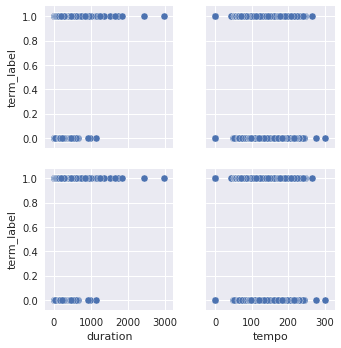

In [18]:
sns.pairplot(mvp_df, x_vars=['duration', 'tempo'], y_vars=['term_label','term_label'])

In [19]:


y = np.array(mvp_df['term_label'])
X = np.array(mvp_df[['duration','tempo']])
#X = X.reshape(-1, 1)

model = LogisticRegression(C= 1000000000000)

recall = cross_val_score(model, X, y, cv=5, scoring='recall')
accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision = cross_val_score(model, X, y, cv=5, scoring='precision')
f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

print('Recall: {}'.format(np.mean(recall)))
print('Accuracy: {}'.format(np.mean(accuracy)))
print('Precision: {}'.format(np.mean(precision)))
print('F1: {}'.format(np.mean(f1)))

Recall: 0.9986242476354257
Accuracy: 0.6210099025584601
Precision: 0.6212177987097591
F1: 0.7659544848668898


In [20]:


y = np.array(mvp_df['term_label'])
X = np.array(mvp_df[['duration','tempo']])
#X = X.reshape(-1, 1)

X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=.2, random_state=30)
kf = KFold(n_splits=5, shuffle=True, random_state = 2)

recall = []
accuracy = []
precision = []
f1 = []
for train_ind, val_ind in kf.split(X,y):
    model = LogisticRegression(C= 1000000000000)
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    recall.append(recall_score(y_val, y_pred))
    accuracy.append(accuracy_score(y_val, y_pred))
    precision.append(precision_score(y_val, y_pred))
    f1.append(f1_score(y_val, y_pred))

print('Recall: {}'.format(recall))
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('F1: {}'.format(f1))

Recall: [0.9966130397967824, 1.0, 0.9991438356164384, 0.999129677980853, 1.0]
Accuracy: [0.6286019210245464, 0.6237993596584845, 0.6241324079017618, 0.6134543513080619, 0.615056059797117]
Precision: [0.6297485286249331, 0.6237993596584845, 0.6240641711229946, 0.6135756280064136, 0.6146445750935329]
F1: [0.7718032786885246, 0.7683207361156753, 0.7682685977616852, 0.7602649006622516, 0.7613373055279709]


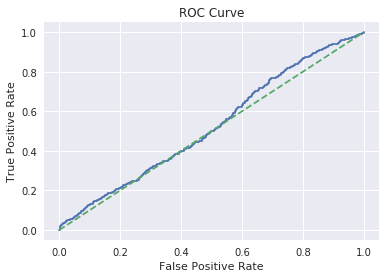

In [21]:

model.fit(X_fit, y_fit)
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')
    
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [22]:
auc_score

0.5234150817484151